## Analysis.

In [698]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

### Renda bruta.

In [963]:
renta = pd.read_csv("csv/2020_atles_renda_bruta_llar.csv")
renta.sample()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Import_Renda_Bruta_€
650,2020,7,Horta-Guinardó,37,el Carmel,65,28828


Get the mean of the Renda_Bruta per Barri.

In [964]:
mean_renda = renta.groupby('Nom_Barri', as_index=False)['Import_Renda_Bruta_€'].mean()

In [965]:
x = pd.merge(renta, mean_renda, on= "Nom_Barri", how="left")

In [966]:
mean_renda = x.drop(columns=["Any", "Seccio_Censal", "Import_Renda_Bruta_€_x"])

In [968]:
mean_renda = mean_renda.drop_duplicates()

In [969]:
mean_renda.rename(columns={"Import_Renda_Bruta_€_y":"Renda_bruta_€"}, inplace=True)

In [970]:
# export to json
mean_renda.to_json(r"csv/json_renda.json", force_ascii=False, orient="records")

In [971]:
renda_scaler = mean_renda.copy()

#### Scale the value.

scale the value of the mean to a 40% the maximum value and from there down, this is to get the scores from the 4 points to evaluate and in total give a 100%.

In [972]:
# scale the values from 0 to 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
renda_scaler["incomeScore"] = scaler.fit_transform(renda_scaler["Renda_bruta_€"].values.reshape(-1, 1))

In [973]:
renda_scaler.sample(5)

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Renda_bruta_€,incomeScore
227,3,Sants-Montjuïc,11,el Poble Sec,37292.125000,0.115412
252,3,Sants-Montjuïc,13,la Marina de Port,38876.529412,0.132522
431,5,Sarrià-Sant Gervasi,25,Sant Gervasi- la Bonanova,98043.888889,0.771481
768,8,Nou Barris,49,Canyelles,40956.800000,0.154987
728,8,Nou Barris,45,Porta,37472.277778,0.117358


In [974]:
renda_scaler["incomeScore"] = renda_scaler["incomeScore"]*40

In [975]:
renda_scaler = renda_scaler.drop_duplicates()

In [976]:
renda_scaler.rename(columns={"Renda_bruta_€":"incomeAvg"}, inplace=True)

In [978]:
renda_scaler.sample()

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,incomeAvg,incomeScore
163,2,L'Eixample,9,la Nova Esquerra de l'Eixample,57096.675,13.171389


### Encuensta Digital.

data from the bacelona open data, where la encuesta is from 2020 and is about accesibility of internet conexions and machines to get connected per house.

In [979]:
encuesta_digital = pd.read_csv("csv/2020_050067_bbdd_escletxadigital2020-v4.csv")
pd.set_option("display.max_columns", None)

In [980]:
encuesta_digital.sample()

,ID,METODE,DATA,Codi_Districte,Nom_Districte,F0,F1,F2,RENDA,Q1,Q2,EDAT,ID4,ID4_PAIS,ID5,P9,ID7,ID8,ID9,P1,P1A,Q1A,P1B,P2_1,P2_2,P2_3,P2_4,P2_6,P2_7,P2_5,P2_5B,P2,P2A,P2B,P3_1,P3_2,P3_3,P3_0,P3_95,P3_98,P3_99,P4,P5A_1,P5A_2,P5A_3,P5A_4,P5A_5,P5A_6,P5A_7,P5A_8,P5A_9,P5A_10,P5A_11,P5A_12,P5A_13,P5A_14,P5A_15,P5A_16,P5A_17,P5A_18,P5A_19,P5A_20,P5A_18_cod,P6,P7,Q8,P8B,P9B,P10,P10B_1,P10B_2,P10B_3,P10B_4,P10B_5,P10B_6,P10B_95,P10B_98,P10B_99,P11_0,P11_1,P11_2,P11_3,P11_4,P11_5,P11_98,P11_99,P11B,P11C_1,P11C_2,P11C_3,P11C_4,P11C_5,P11C_6,P11C_95,P11C_98,P11C_99,P12,Q12,P13,P13B_1,P13B_2,P13B_3,P13B_4,P13B_5,P13B_98,P13B_99,ID10,ID11,P14,P14_1cod,P14_2cod,P5A_1rec,P5A_2rec,P5A_3rec,P5A_4rec,P5A_5rec,P5A_6rec,P5A_7rec,P5A_8rec,P5A_9rec,P5A_10rec,P5A_11rec,P5A_12rec,P5A_13rec,P5A_14rec,P5A_15rec,P5A_16rec,P5A_17rec,P5A_18rec,P5A_19rec,P5A_20rec,P2_LLAR,Longitud,Latitud,Pes
380,864,1,20201020,2,Eixample,2,1,1,3,2,74,6,3,276.0,3,NaN,1,1,0,2,NaN,NaN,7.0,0,0,0,0,0,0,0,NaN,2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.149765,41.384366,0.91384


In [981]:
# Filter the data for actual values needed.
encuesta_digital = encuesta_digital[["Codi_Districte", "Nom_Districte", "Q1", "EDAT", "P1", "P1A", "Q1A", "P2_1", "P2_2", "P2_3", "P2_4"]]

In [982]:
encuesta_graph = encuesta_digital.copy()

In [983]:
encuesta_digital.rename(columns={"Q1":"sexo", "EDAT":"edad", "P1":"conexion a internet","P1A":"tipo de conexion", "Q1A":"calidad de internet", "P2_1":"smartphone","P2_3":"portatil", "P2_2":"tablet", "P2_4":"ordenador"}, inplace=True)

In [984]:
encuesta_digital.sample()

,Codi_Districte,Nom_Districte,sexo,edad,conexion a internet,tipo de conexion,calidad de internet,smartphone,tablet,portatil,ordenador
406,10,Sant Martí,1,4,1,2.0,5.0,3,1,1,1


In [986]:
# dicctionaties to change values.
conexion = {1:10, 2:0, 98:0}
calidad = {98:7, 99:7}
# dictionary to change the values 98, 99 with the mean.
smart = {98:3, 99:3}
tablet = {98:1.5, 99:1.5}
portatil = {98:2, 99:2}
ordenador = {98:1, 99:1}


In [987]:
# Change values.
encuesta_digital["valor conexion"] = encuesta_digital["conexion a internet"].replace(conexion)
encuesta_digital["valor calidad"] = encuesta_digital["calidad de internet"].replace(calidad)
encuesta_digital["valor smart"] = encuesta_digital["smartphone"].replace(smart)
encuesta_digital["valor tablet"] = encuesta_digital["tablet"].replace(tablet)
encuesta_digital["valor portatil"] = encuesta_digital["portatil"].replace(portatil)
encuesta_digital["valor ordenador"] = encuesta_digital["ordenador"].replace(ordenador)

In [988]:
encuesta_digital["valor tablet"].value_counts()

valor tablet
1.0    1043
0.0     992
2.0     364
3.0      91
4.0      31
1.5      16
5.0       4
7.0       1
Name: count, dtype: int64

In [989]:
# multiply the values to get a smaller number, because it does not have that importance on the value.
encuesta_digital["valor smart"] = encuesta_digital["valor smart"]*.5
encuesta_digital["valor tablet"] = encuesta_digital["valor tablet"]*.5
encuesta_digital["valor portatil"] = encuesta_digital["valor portatil"]*.5
encuesta_digital["valor ordenador"] = encuesta_digital["valor ordenador"]*.5

In [990]:
encuesta_digital.sample()

,Codi_Districte,Nom_Districte,sexo,edad,conexion a internet,tipo de conexion,calidad de internet,smartphone,tablet,portatil,ordenador,valor conexion,valor calidad,valor smart,valor tablet,valor portatil,valor ordenador
2060,4,Les Corts,2,2,1,2.0,8.0,2,0,0,1,10,8.0,1.0,0.0,0.0,0.5


In [991]:
# sum all the values to get the main.
encuesta_digital["valor"] = encuesta_digital["valor calidad"] + encuesta_digital["valor conexion"]+ encuesta_digital["valor smart"] + encuesta_digital["valor tablet"] + encuesta_digital["valor portatil"] + encuesta_digital["valor ordenador"]

In [992]:
# filter the data for needed information.
encuesta_valor = encuesta_digital[["Codi_Districte", "Nom_Districte", "valor"]]

In [993]:
encuesta_valor = encuesta_valor.groupby(['Codi_Districte', 'Nom_Districte'])['valor'].mean().reset_index()

In [994]:
encuesta_valor

,Codi_Districte,Nom_Districte,valor
0,1,Ciutat Vella,20.210000
1,2,Eixample,20.527228
2,3,Sants - Montjuïc,20.553309
3,4,Les Corts,20.725543
4,5,Sarrià - Sant Gervasi,20.831776
5,6,Gràcia,20.352941
6,7,Horta - Guinardó,20.281690
7,8,Nou Barris,20.340590
8,9,Sant Andreu,20.326687
9,10,Sant Martí,20.649074


#### Scale the value

This was going to get into the values, but at the end its a biased information, its an encuesta so we dont know how many people where asked for in what neighborhood, we can see that it acctually there where not people asked about it on ciutat vella. So at the end this code didnt work much

In [995]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
encuesta_valor["valor"] = scaler.fit_transform(encuesta_valor["valor"].values.reshape(-1, 1))
encuesta_valor["digitalValue"] = encuesta_valor["valor"]*20
encuesta_valor.drop(columns=["valor"], inplace=True)

#### Exploring.

In [999]:
encuesta_graph.sample()

,Codi_Districte,Nom_Districte,Q1,EDAT,P1,P1A,Q1A,P2_1,P2_2,P2_3,P2_4
484,10,Sant Martí,1,5,1,2.0,8.0,4,1,3,1


In [1000]:
# dictionaries with real values.
Q1 = {1:"home", 2: "dona", 3: "nobinari"}
EDAT = {1:"16 a 24", 2:"25 a 34", 3:"35 a 44", 4:"45 a 54", 5:"55 a 64", 6:"65 a 64", 7:"75 +"}
P1 = {1:"SI", 2:"NO", 98:"no ho sap", 99:"no contesta"}
P1A = {1:"ADL/VDSL/SDSL", 2:"fibra optica", 3:"hibrid de firba i coaxial (HFC)", 4:"internet radio/4G", 95:"altres sistemes", 98:"no ho sap", 99:"no contesta"}
Q1A = {0:"dolenta", 1.0:"dolenta", 2.0:"dolenta", 3.0:"dolenta", 4.0:"regular", 5.0:"regular", 6.0:"regular", 7.0:"molt bona", 8.0:"molt bona", 9.0:"molt bona",10:"molt bona", 98:"no ho sap", 99:"no contesta"}
P2_1 = {98: 0, 99:0}
P2_2 = {98:0, 99:0}
P2_3 = {98:0, 99:0}
P2_4 = {98:0, 99:0}


In [1002]:
# create new columns with replace dictionary values.
encuesta_graph["sexo"] = encuesta_graph["Q1"].replace(Q1)
encuesta_graph["edad"] = encuesta_graph["EDAT"].replace(EDAT)
encuesta_graph["conexion a internet"] = encuesta_graph["P1"].replace(P1)
encuesta_graph["tipo de conexion"] = encuesta_graph["P1A"].replace(P1A)
encuesta_graph["calidad de internet"] = encuesta_graph["Q1A"].replace(Q1A)
encuesta_graph["smartphone"] = encuesta_graph["P2_1"].replace(P2_1)
encuesta_graph["tablet"] = encuesta_graph["P2_2"].replace(P2_2)
encuesta_graph["portatil"] = encuesta_graph["P2_3"].replace(P2_3)
encuesta_graph["ordenador"] = encuesta_graph["P2_4"].replace(P2_4)


In [1003]:
# Filter df.
encuesta = encuesta_graph[["Codi_Districte", "Nom_Districte", "sexo", "edad", "conexion a internet", "tipo de conexion",
                             "calidad de internet", "smartphone", "tablet", "portatil", "ordenador"]]

In [1004]:
print(encuesta.isna().sum())

Codi_Districte           0
Nom_Districte            0
sexo                     0
edad                     0
conexion a internet      0
tipo de conexion       203
calidad de internet    203
smartphone               0
tablet                   0
portatil                 0
ordenador                0
dtype: int64


In [1005]:
# rellenar null values
encuesta["tipo de conexion"].fillna("no ho sap",inplace=True)
encuesta["calidad de internet"].fillna("no ho sap", inplace=True)

In [1006]:
encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Codi_Districte       2542 non-null   int64 
 1   Nom_Districte        2542 non-null   object
 2   sexo                 2542 non-null   object
 3   edad                 2542 non-null   object
 4   conexion a internet  2542 non-null   object
 5   tipo de conexion     2542 non-null   object
 6   calidad de internet  2542 non-null   object
 7   smartphone           2542 non-null   int64 
 8   tablet               2542 non-null   int64 
 9   portatil             2542 non-null   int64 
 10  ordenador            2542 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 218.6+ KB


Graph to see the amount of people by sex that where interviewed.

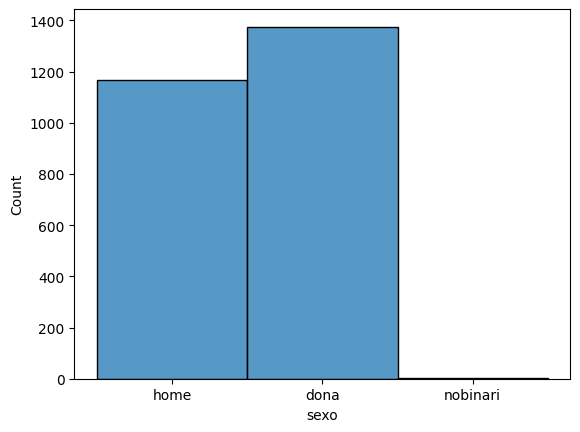

In [1007]:
sns.histplot(data=encuesta, x="sexo");

Graph that shows how many people have access to internet in their home.

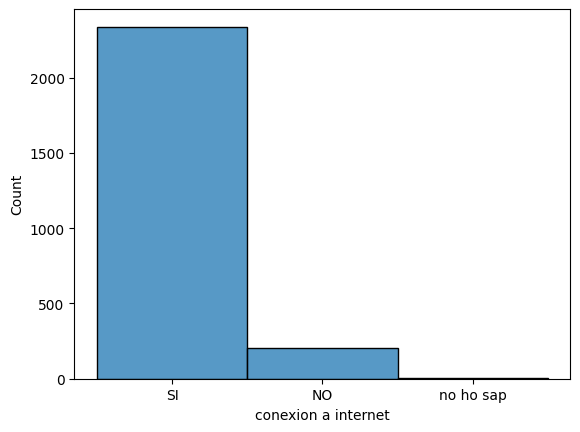

In [146]:
sns.histplot(data=encuesta, x="conexion a internet");

Graph of how many smartphones has each family.

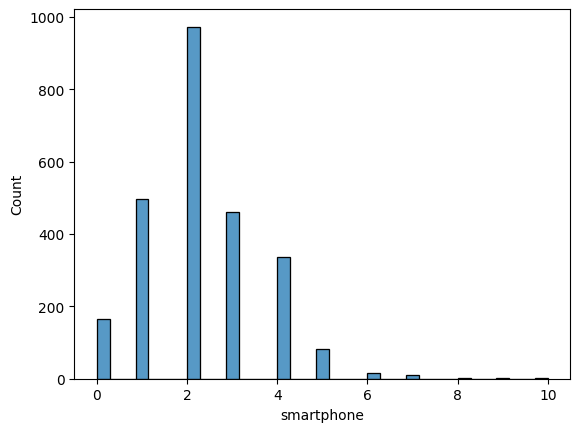

In [149]:
sns.histplot(data=encuesta, x="smartphone");

How many portatila have each people in their house

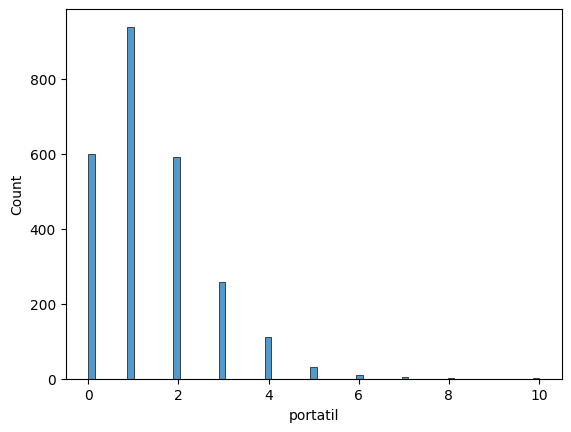

In [148]:
sns.histplot(data=encuesta, x="portatil");

The range of years of each people interviewed.

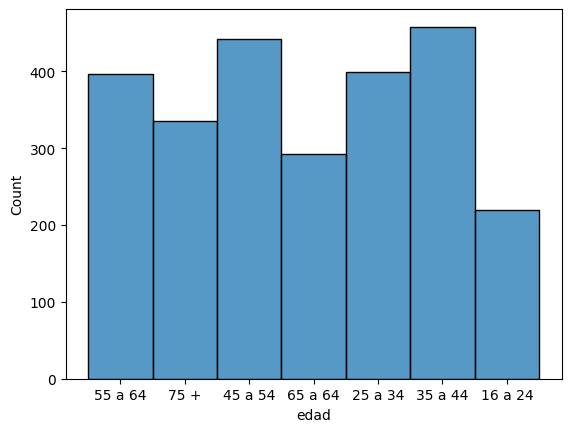

In [1008]:
sns.histplot(data=encuesta, x="edad");

In [1009]:
encuesta["calidad de internet"].value_counts()

calidad de internet
molt bona      1917
regular         336
no ho sap       250
dolenta          32
no contesta       7
Name: count, dtype: int64

### Centros civicos

This data is from Barcelona open data, where it shows the centros civicos that are in the city of Barcelona, it shows the quantity of afluence and how big each centro civico is, it also has the coordinates.

In [1011]:
civic = pd.read_csv("csv/2021_centres_civics_activitats_formacio.csv")

In [1012]:
civic.isna().sum()

Any                   0
Equipament            0
Indicador             0
Valor                 0
Notes_Dades         153
Notes_Equipament    147
Codi_Districte        0
Nom_Districte         0
Codi_Barri            0
Nom_Barri             0
Titularitat           0
TipusGeneral          0
TipusEquipament       0
Ambit                 0
Latitud               0
Longitud              0
dtype: int64

In [1013]:
civic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Any               153 non-null    int64  
 1   Equipament        153 non-null    object 
 2   Indicador         153 non-null    object 
 3   Valor             153 non-null    int64  
 4   Notes_Dades       0 non-null      float64
 5   Notes_Equipament  6 non-null      object 
 6   Codi_Districte    153 non-null    int64  
 7   Nom_Districte     153 non-null    object 
 8   Codi_Barri        153 non-null    int64  
 9   Nom_Barri         153 non-null    object 
 10  Titularitat       153 non-null    object 
 11  TipusGeneral      153 non-null    object 
 12  TipusEquipament   153 non-null    object 
 13  Ambit             153 non-null    object 
 14  Latitud           153 non-null    float64
 15  Longitud          153 non-null    float64
dtypes: float64(3), int64(4), object(9)
memory us

In [1014]:
civic.Ambit.value_counts()

Ambit
Multidisciplinaris i altres    153
Name: count, dtype: int64

In [1016]:
civic.sample()

,Any,Equipament,Indicador,Valor,Notes_Dades,Notes_Equipament,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Titularitat,TipusGeneral,TipusEquipament,Ambit,Latitud,Longitud
11,2021,Centre Cívic Bon Pastor,Metres_quadrats,1370,NaN,NaN,9,Sant Andreu,59,el Bon Pastor,Municipal,Centres cívics,Centres cívics,Multidisciplinaris i altres,41.43478,2.204912


In [1017]:
# filtering with wanted columns.
civic = civic[["Equipament", "Indicador", "Valor", "Codi_Districte", "Nom_Districte", "Codi_Barri", "Nom_Barri", "Latitud", "Longitud"]]

Se tomaran en cuenta para su valor la cantidad de actividades de formacion, las inscripciones por actividades y los metros cuadrados que tengan cada centro civico.


In [1019]:
valores_civic = civic.groupby('Equipament')['Valor'].sum()

In [1020]:
# make it df.
valores_civic = valores_civic.to_frame()

In [1021]:
# reset index and then merge it to the data frame.
valores_civic.reset_index()
x = pd.merge(civic, valores_civic, on= "Equipament", how="left")

In [1022]:
x.drop(columns=["Valor_x", "Indicador"], inplace=True)

In [1023]:
civic = x.drop_duplicates()

In [1024]:
civic.rename(columns={"Valor_y":"Valor_CentroCivic"}, inplace=True)

In [1025]:
civic_total = civic.copy()

In [1026]:
civic_total.sample()

,Equipament,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Latitud,Longitud,Valor_CentroCivic
99,Centre Cívic Navas,9,Sant Andreu,63,Navas,41.416905,2.184919,3261


#### scale the values.

Will scale the value of the sum of each valid point and get them a 10% of the total value to get the estimated number.

In [1027]:
civic_total = civic_total.groupby("Codi_Barri")["Valor_CentroCivic"].sum()
civic_total = civic_total.to_frame()
civic_total = civic_total.reset_index()

In [1028]:
scaler = MinMaxScaler(feature_range=(0, 1))
civic_total["Valor_CentroCivic"] = scaler.fit_transform(civic_total["Valor_CentroCivic"].values.reshape(-1, 1))

civic_total["centerScore"] = civic_total["Valor_CentroCivic"]*10

civic_total.drop(columns=["Valor_CentroCivic"], inplace=True)

In [1030]:
civic_total.sample(3)

,Codi_Barri,centerScore
15,22,1.691827
4,5,1.680115
24,38,0.441176


### Educacio no reglada.

In [1031]:
educacio = pd.read_csv("csv/opendatabcn_educacio_ensenyament_no-reglat.csv", encoding='utf-16')

In [1032]:
educacio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   register_id                    237 non-null    object 
 1   name                           237 non-null    object 
 2   institution_id                 15 non-null     float64
 3   institution_name               15 non-null     object 
 4   created                        237 non-null    object 
 5   modified                       237 non-null    object 
 6   addresses_roadtype_id          0 non-null      float64
 7   addresses_roadtype_name        0 non-null      float64
 8   addresses_road_id              237 non-null    int64  
 9   addresses_road_name            237 non-null    object 
 10  addresses_start_street_number  237 non-null    int64  
 11  addresses_end_street_number    19 non-null     float64
 12  addresses_neighborhood_id      237 non-null    int

In [1033]:
educacio.sample()

,register_id,name,institution_id,institution_name,created,modified,addresses_roadtype_id,addresses_roadtype_name,addresses_road_id,addresses_road_name,addresses_start_street_number,addresses_end_street_number,addresses_neighborhood_id,addresses_neighborhood_name,addresses_district_id,addresses_district_name,addresses_zip_code,addresses_town,addresses_main_address,addresses_type,values_id,values_attribute_id,values_category,values_attribute_name,values_value,values_outstanding,values_description,secondary_filters_id,secondary_filters_name,secondary_filters_fullpath,secondary_filters_tree,secondary_filters_asia_id,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y
179,﻿75990349520,"CEV, Centre de Comunicació, Imatge i So",NaN,NaN,1996-09-18T00:00:00+02:00,2023-02-28T13:30:10.076746+01:00,NaN,NaN,11506,Alpens,19,NaN,16,la Bordeta,3,Sants-Montjuïc,8014,BARCELONA,True,NaN,151801.0,20001.0,Telèfons,Tel.,931762343,True,NaN,56732073,Formació professional,Planol BCN >> Educació >> Ensenyament reglat >...,651,65103003001005,428109.571095,4.580441e+06,41.372274,2.140344


In [1034]:
educacio = educacio[["name", "addresses_road_name", "addresses_start_street_number", "addresses_neighborhood_id", "addresses_neighborhood_name", "addresses_district_id", "addresses_district_name",
                     "addresses_zip_code", "addresses_town", "secondary_filters_name", "values_value", "geo_epgs_4326_x", "geo_epgs_4326_y"]]

In [1035]:
educacio["secondary_filters_name"].value_counts()

secondary_filters_name
Idiomes                            123
Informàtica                         47
Adults                              43
Formació professional               13
Educació secundària                  7
Ensenyament infantil (3-6 anys)      2
Educació primària                    2
Name: count, dtype: int64

In [1036]:
# solo seleccionar lo necesario para este proyecto, los centros de educacion en informatica.
educacio_informatica = educacio[educacio["secondary_filters_name"]=="Informàtica"]

In [1037]:
# change type of columns to str.
educacio_informatica['addresses_start_street_number'] = educacio_informatica['addresses_start_street_number'].astype(str)
educacio_informatica['addresses_zip_code'] = educacio_informatica['addresses_zip_code'].astype(str)

In [1038]:
# create new column with address.
educacio_informatica['direccion'] = educacio_informatica[['addresses_road_name', 'addresses_start_street_number', 'addresses_zip_code', 'addresses_town']].apply(lambda x: ', '.join(x[x.notnull()]), axis = 1)

In [1039]:
educacio_informatica.drop(columns=["addresses_town", "addresses_zip_code", "addresses_start_street_number", "addresses_road_name"], inplace=True)

In [1040]:
# rename columns.
educacio_informatica.rename(columns={"name":"Equipament", "addresses_neighborhood_id":"Codi_Barri", "addresses_neighborhood_name":"Nom_Barri", "addresses_district_id":"Codi_Districte",
                                     "addresses_district_name":"Nom_Districte", "geo_epgs_4326_x":"Latitud", "geo_epgs_4326_y":"Longitud", "values_value":"telephone", "secondary_filters_name":"filtro"}, inplace=True)

In [1041]:
educacio_informatica.sample()

,Equipament,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,filtro,telephone,Latitud,Longitud,direccion
91,Acadèmia Netmind *Bruc,7,la Dreta de l'Eixample,2,Eixample,Informàtica,933041720,41.391158,2.17359,"C Bruc, 29, 8010, BARCELONA"


In [1045]:
educacio_informatica.rename(columns={"Equipament":"Name", "Codi_Barri":"neighborhoodCode", "Nom_Barri":"neighborhoodName", "Codi_Districte":"districtId", "Nom_Districte":"districtName", "direccion":"address"}, inplace=True)
	

In [1046]:
# export to json
educacio_informatica.to_json(r"csv/education.json", force_ascii=False, orient="records")

### Mobilidad

#### buses

Data base from all the bus stations in the city of Barcelona, also what type of bus and the number route.

In [1047]:
bus = pd.read_csv("csv/ESTACIONS_BUS.csv")

In [1048]:
# Filter needed data.
bus = bus[["NOM_CAPA", "EQUIPAMENT", "BARRI", "NOM_BARRI"]]

In [1049]:
# Group by neighborhood and get the sum of the amount of stations per each barrio.
bus = bus.groupby("BARRI")['BARRI'].sum()

In [1050]:
bus = bus.to_frame()

In [1051]:
bus.rename(columns={"BARRI":"count_bus"}, inplace=True)

In [1052]:
bus = bus.reset_index()

In [1053]:
bus["BARRI"] = bus["BARRI"].astype(int)

In [1054]:
bus.sample()

,BARRI,count_bus
67,68,4352


#### Transportation

Data from all the transportation inside the city of Barcelona, it counts the metro stations, and train.

In [1055]:
trans = pd.read_csv("csv/TRANSPORTS.csv")

In [1056]:
trans = trans[["NOM_CAPA", "EQUIPAMENT", "BARRI", "NOM_BARRI"]]

In [1057]:
# Group by neighborhood and get the sum of the amount of stations per each barrio.
trans = trans.groupby("BARRI")['BARRI'].sum()

In [1058]:
trans = trans.to_frame()

In [1059]:
trans.rename(columns={"BARRI":"count_transport"}, inplace=True)

In [1060]:
trans = trans.reset_index()

In [1061]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BARRI            65 non-null     float64
 1   count_transport  65 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [1062]:
trans["BARRI"] = trans["BARRI"].astype(int)
trans["count_transport"] = trans["count_transport"].astype(int)


In [1064]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   BARRI      73 non-null     int32
 1   count_bus  73 non-null     int64
dtypes: int32(1), int64(1)
memory usage: 1004.0 bytes


In [1065]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   BARRI            65 non-null     int32
 1   count_transport  65 non-null     int32
dtypes: int32(2)
memory usage: 648.0 bytes


In [1069]:
#Mege the 2 df of mobility.
mobility = pd.merge(trans, bus, on='BARRI', how='left') 

In [1070]:
# sum the values of the amount of stations in each barrio.
mobility["mobilityScore"] = mobility["count_bus"] + mobility["count_transport"]

In [1068]:
mobility

,BARRI,count_transport,count_bus,mobilityScore
0,1,15,43,58
1,2,10,76,86
2,3,6,135,141
3,4,24,152,176
4,5,65,200,265
...,...,...,...,...
60,69,345,3174,3519
61,70,840,3010,3850
62,71,355,3053,3408
63,72,432,1656,2088


#### Scale the values

Scale the values of the sum, the total of stations per barrio, with a value of 30% of importance.

In [1071]:
scaler = MinMaxScaler(feature_range=(0, 1))
mobility["mobilityScore"] = scaler.fit_transform(mobility["mobilityScore"].values.reshape(-1, 1))

mobility["mobilityScore"] = mobility["mobilityScore"]*30

mobility.drop(columns=["count_transport", "count_bus"], inplace=True)

In [1072]:
mobility.rename(columns={"BARRI":"Codi_Barri"}, inplace=True)

In [1073]:
mobility

,Codi_Barri,mobilityScore
0,1,0.000000
1,2,0.155498
2,3,0.460940
3,4,0.655313
4,5,1.149574
...,...,...
60,69,19.220659
61,70,21.058867
62,71,18.604221
63,72,11.273602


### Complete scores df.

Get the complete data frame with all the scores of each point. to get the final score of best ranked neighborhood.

In [942]:
# start merging all the df into one.
x = pd.merge(renda_scaler, civic_total, on='Codi_Barri', how='left') 

In [943]:
y = pd.merge(x, mobility, on="Codi_Barri", how="left")

In [944]:
total = pd.merge(y, renda_scaler, on= "Codi_Districte", how="left")

In [945]:
total.sample()

,Codi_Districte,Nom_Districte_x,Codi_Barri_x,Nom_Barri_x,incomeAvg_x,incomeScore_x,centerScore,mobilityScore,Nom_Districte_y,Codi_Barri_y,Nom_Barri_y,incomeAvg_y,incomeScore_y
375,8,Nou Barris,49,Canyelles,40956.8,6.1995,NaN,6.753054,Nou Barris,47,Can Peguera,26605.0,0.0


In [946]:
# filter the df with needed values.
total = total[["Codi_Districte", "Nom_Districte_x", "Codi_Barri_x", "Nom_Barri_x", "incomeAvg_x", "incomeScore_x", "centerScore", "mobilityScore"]]

In [947]:
total = total.drop_duplicates()

In [948]:
total["Codi_Barri_x"].value_counts()

Codi_Barri_x
1     1
38    1
54    1
53    1
52    1
     ..
25    1
24    1
23    1
22    1
73    1
Name: count, Length: 73, dtype: int64

In [957]:
# rename column names.
total.rename(columns={"Codi_Districte": "districtId", "Nom_Barri_x":"Nom_Barri", "Nom_Districte_x":"districtName", "Codi_Barri_x":"neighborhoodCode", "Nom_Barri":"neighborhoodName", "incomeAvg_x":"incomeAvg", "incomeScore_x":"incomeScore"}, inplace=True)

In [958]:
total.centerScore.fillna(0,inplace=True)

In [1074]:
# sum the total of the scores to get the main score that will evaluate the neighbothood.
total["totalScore"] = total["incomeScore"] + total["centerScore"] + total["mobilityScore"] 

In [1075]:
total

,districtId,districtName,neighborhoodCode,neighborhoodName,incomeAvg,incomeScore,centerScore,mobilityScore,totalScore
0,1,Ciutat Vella,1,el Raval,30034.809524,1.481564,1.019001,0.000000,2.500564
4,1,Ciutat Vella,2,el Barri Gòtic,36756.333333,4.385038,2.127798,0.155498,6.668334
8,1,Ciutat Vella,3,la Barceloneta,31853.000000,2.266961,2.870901,0.460940,5.598802
12,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",37578.846154,4.740336,1.793337,0.655313,7.188986
16,2,L'Eixample,5,el Fort Pienc,52484.950000,11.179277,1.680115,1.149574,14.008966
...,...,...,...,...,...,...,...,...,...
575,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,61567.714286,15.102729,0.000000,19.220659,34.323388
585,10,Sant Martí,70,el Besòs i el Maresme,33424.923077,2.945980,5.320146,21.058867,29.324993
595,10,Sant Martí,71,Provençals del Poblenou,46102.750000,8.422379,0.000000,18.604221,27.026600
605,10,Sant Martí,72,Sant Martí de Provençals,42089.166667,6.688645,7.229308,11.273602,25.191555


In [1076]:
# export to json
total.to_json(r"csv/score.json", force_ascii=False, orient="records")